## Problem:
Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

## Import necessary libraries

In [1]:
# Run the below javascript so that the plots don't get hidden behind 
# scrollbars while plotting in a loop

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans


from sklearn.decomposition import PCA

In [5]:
# Matplotlib configurations

# Display interactive plots. Used this since convenient for displaying plots in github.
# %matplotlib notebook
%matplotlib notebook
# Font and figure size:
# Ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Load data

In [6]:
wine_df = pd.read_csv("wine.csv")

In [7]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Observations:
- Dataset contains 178 records, 13 features(columns) and one column containing info about the clusters the wine samples belong to. 
- We consider only the features for analysis and perform PCA and clustering, then verify with the previously defined clusters.
- The dataset does not contain any null values.
- All features are recorded with correct datatypes.

## Data preprocessing

In [9]:
wine_df1 = wine_df.copy()
wine_df1.drop('Type', axis=1, inplace=True)

In [10]:
wine_df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# Standardization
scaler = StandardScaler()
wine_df_sc = scaler.fit_transform(wine_df1)

#performing PCA on the standardized features.
pca = PCA(n_components=3)
wine_df_tf = pd.DataFrame(pca.fit_transform(wine_df_sc))#,columns=['pc1', 'pc2', 'pc3'])

In [12]:
wine_df_tf.head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


## 1. Hierarchical clustering

<IPython.core.display.Javascript object>


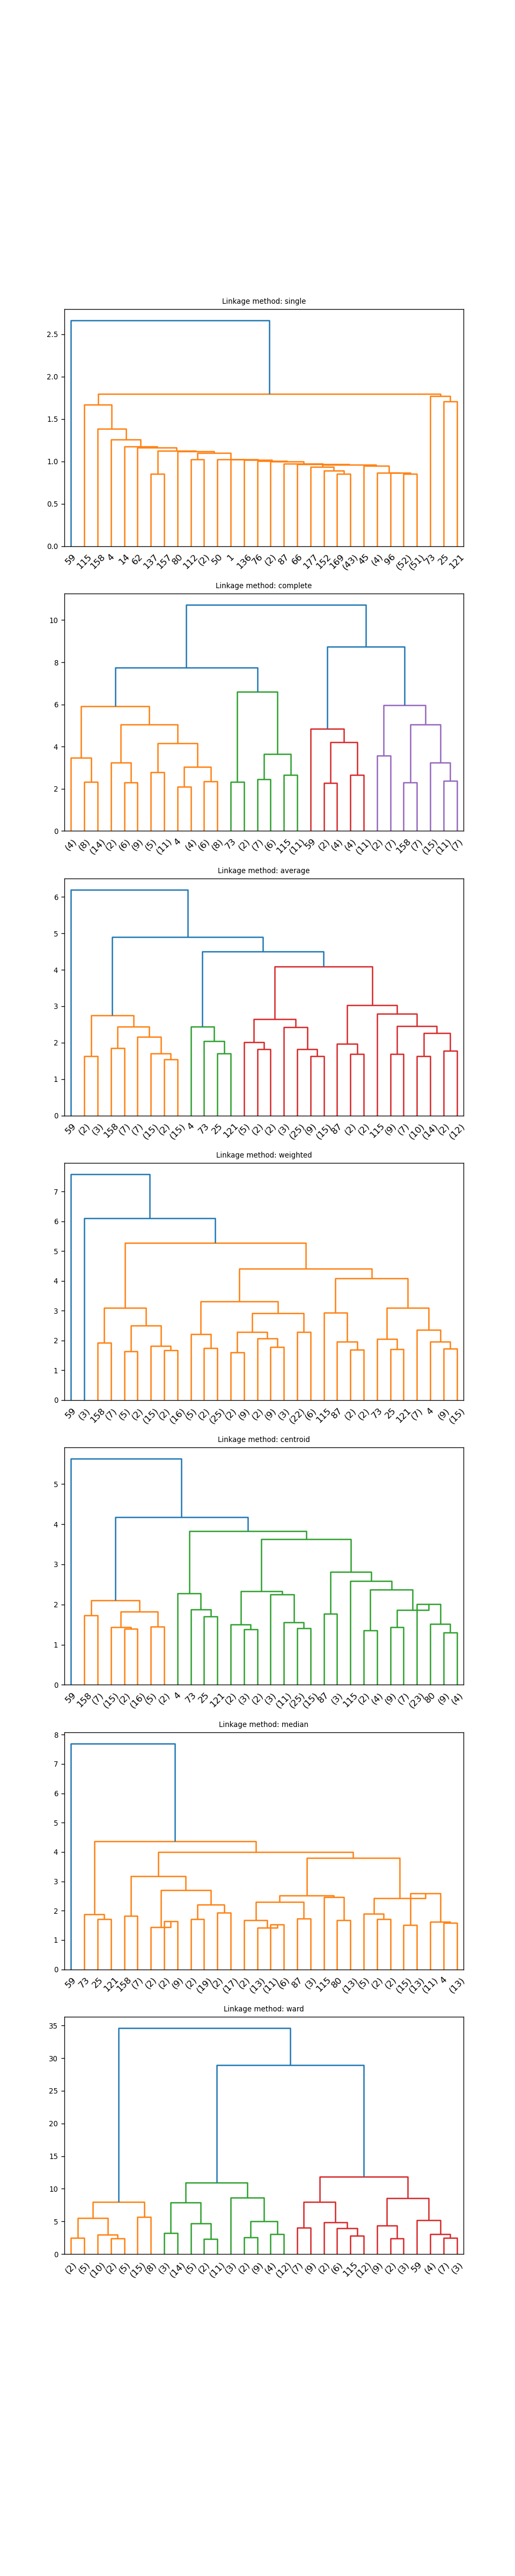

In [13]:
linkg_mets = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']# all linkage methods.

# plotting dendrograms to visualize the clusters for different linkage methods.
fig, ax = plt.subplots(nrows=len(linkg_mets), figsize=(8,40))
linkg_mets = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
plot_num = 0
for method in linkg_mets:
    # Setting to truncate the dendrogram: The last p non-singleton clusters formed in the linkage.
    sch.dendrogram(sch.linkage(wine_df_tf, method=method),truncate_mode='lastp',ax=ax[plot_num])
    ax[plot_num].set_title("Linkage method: {}".format(method))
    plot_num = plot_num + 1

## Observations:
- By inspection, we see that out of all the linkage methods, only "complete" and "ward" are able to make distinct clusters without any individual elements. 
- There seems to be no outliers. If there were, we could expect to see individual elements in all of the plots, but they appear in all except two plots("complete" and "ward") and these two are able to produce good clusters.
- We can make 4 clusters from "complete" and 3 clusters from "ward" plots.

In [14]:
# function to plot the results
def cluster_visualization(df_pca, labels, title): # label = y_hc
    u_labels = np.unique(labels)
    
    # Plotting
    fig, ax = plt.subplots()
    for i in u_labels:
        ax.scatter(df_pca.loc[labels == i, 0], df_pca.loc[labels == i, 1], label = i)
        ax.set_title(title)

    ax.legend()
    plt.show()

<IPython.core.display.Javascript object>


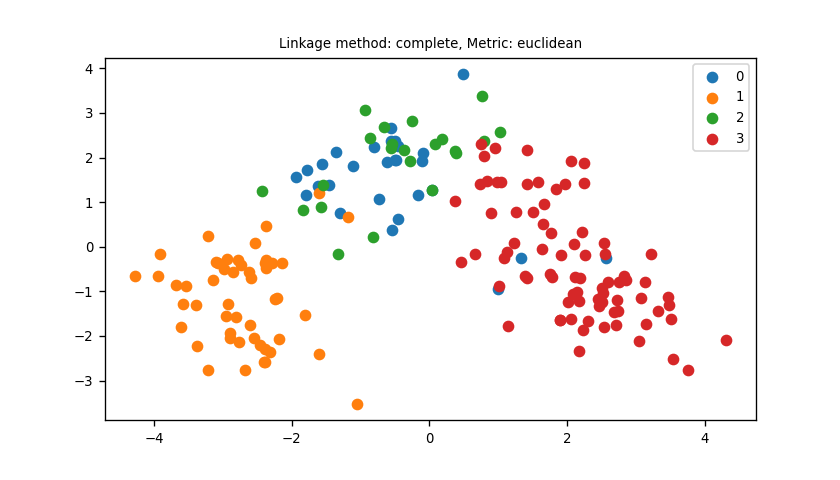

<IPython.core.display.Javascript object>


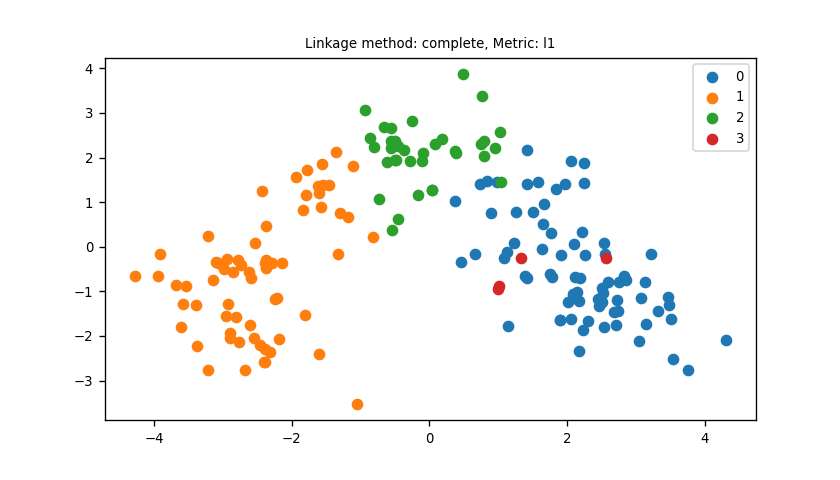

<IPython.core.display.Javascript object>


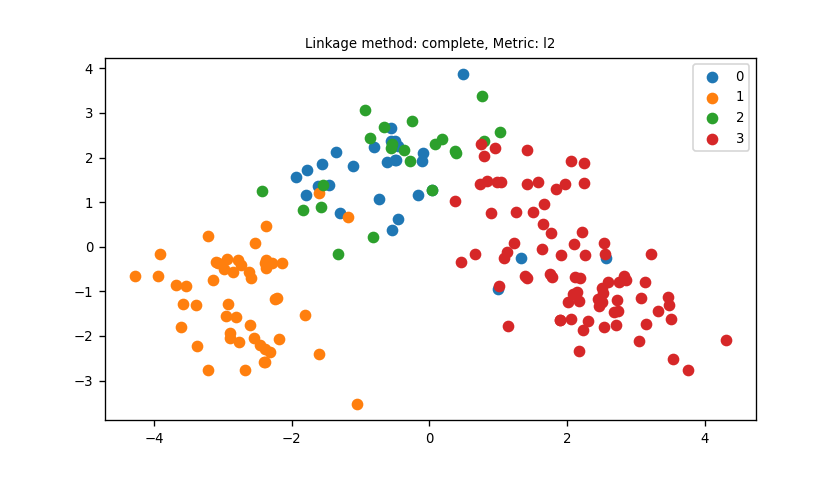

<IPython.core.display.Javascript object>


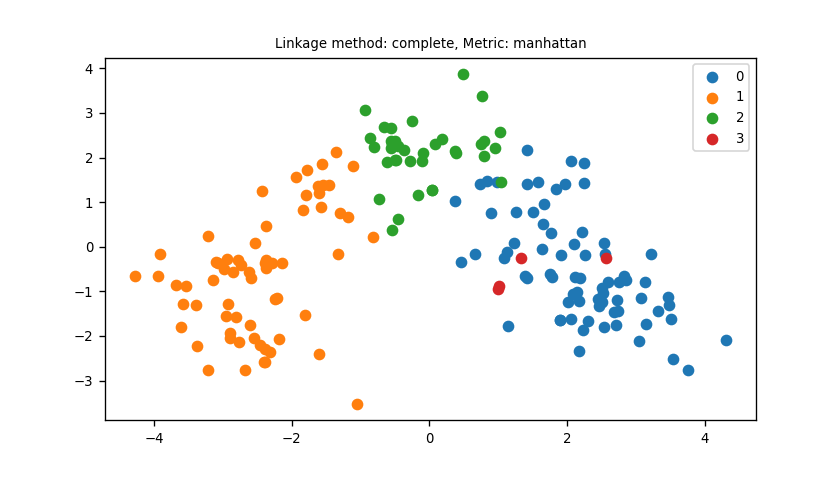

<IPython.core.display.Javascript object>


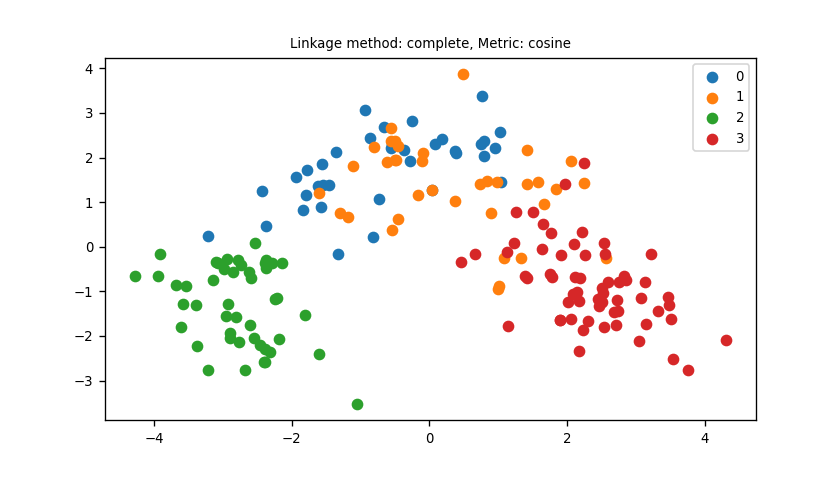

<IPython.core.display.Javascript object>


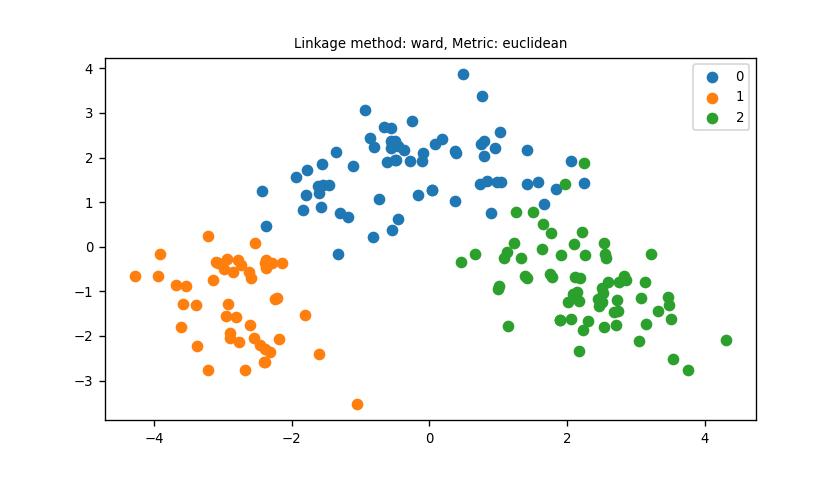

In [15]:
chosen_methods = {'complete':4, 'ward':3} # dictionary holding {'method':n_clusters}
dist_metrics = ["euclidean", "l1", "l2","manhattan", "cosine"]

# Loop to check the performance of chosen methods with different distance metrics.
for method in chosen_methods.keys():
    if method == 'ward': # Since ward only works with "eculidean" metric as per documentation.
        hc = AgglomerativeClustering(n_clusters=chosen_methods[method], affinity='euclidean', linkage='ward')
        labels_hc = hc.fit_predict(wine_df_tf)
        cluster_visualization(wine_df_tf, labels_hc, title='Linkage method: ward, Metric: euclidean')
    else:
        for metric in dist_metrics:
            hc = AgglomerativeClustering(n_clusters=chosen_methods[method], affinity=metric, linkage=method) 
            labels_hc = hc.fit_predict(wine_df_tf)
            cluster_visualization(wine_df_tf, labels_hc, title = str("Linkage method: {}, Metric: {}".format(method,metric)))

In [16]:
# Since ward performs better than others, we chose it for evaluation.
hc = AgglomerativeClustering(n_clusters=chosen_methods['ward'], affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(wine_df_tf)

In [17]:
wine_df_hc = pd.concat([wine_df1, pd.Series(labels_hc, name='clusters_hc')], axis=1)
wine_df_hc.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_hc
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


## Observations:
- From the scatterplots, we can see that "ward" method is able to divide the data into three distinct clusters, without any outliers.

## Kmeans clustering

<IPython.core.display.Javascript object>


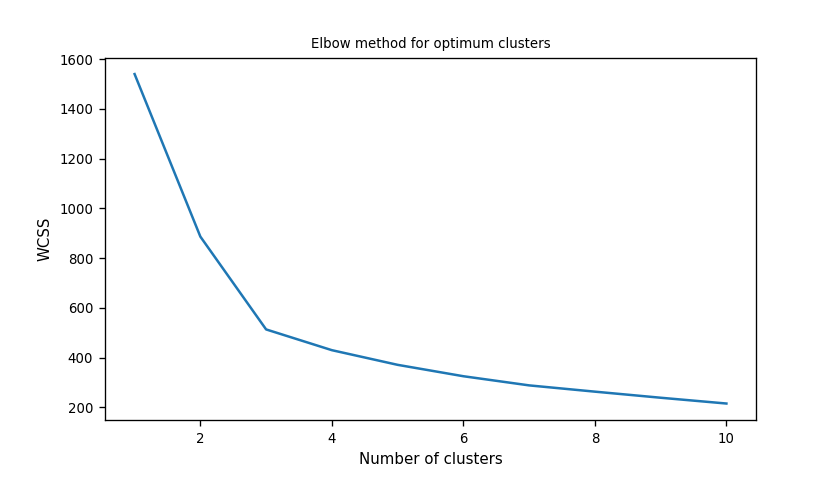

In [18]:
# Finding the optimum number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(wine_df_tf)
    wcss.append(kmeans.inertia_) # Calculate WCSS
    
fig, ax = plt.subplots()
ax.plot(range(1,11),wcss)
ax.set_title('Elbow method for optimum clusters')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

## Observations:
From the elbow curve we see that at 3 or 4 clusters, the rate of decrease in WCSS is becoming gradual. With a lttle trial and error checking the scatterplots for clear distinction between clusters, we see that, with 3 clusters the divisions are very clear compared to 4.

In [19]:
# Build cluster algorithm.
num_clusters = 3 # Chosen by trial and error b/w (3,4)
clusters_new = KMeans(num_clusters, random_state=42)
clusters_new.fit(wine_df_tf)

KMeans(n_clusters=3, random_state=42)

In [20]:
labels_km = clusters_new.labels_
# Assign clusters to the dataset.
wine_df_km = pd.concat([wine_df1, pd.Series(labels_km, name='clusters_km')], axis=1)

In [21]:
wine_df_km.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_km
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<IPython.core.display.Javascript object>


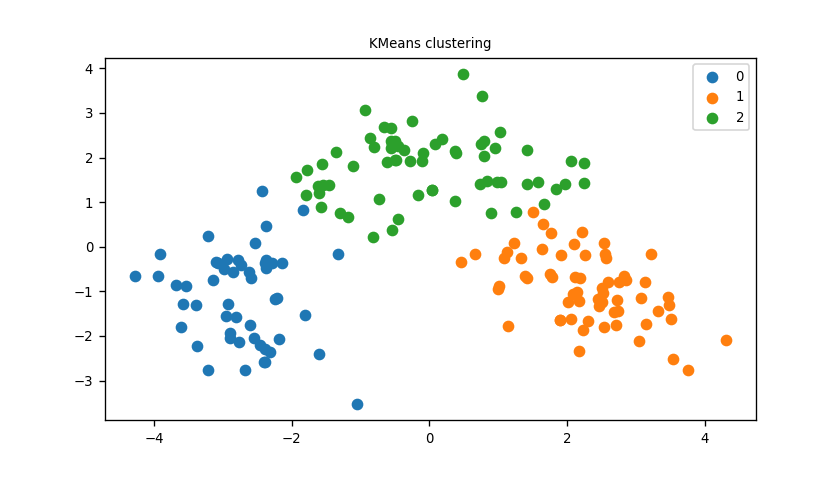

In [22]:
cluster_visualization(wine_df_tf, labels_km, title = "KMeans clustering")

<IPython.core.display.Javascript object>


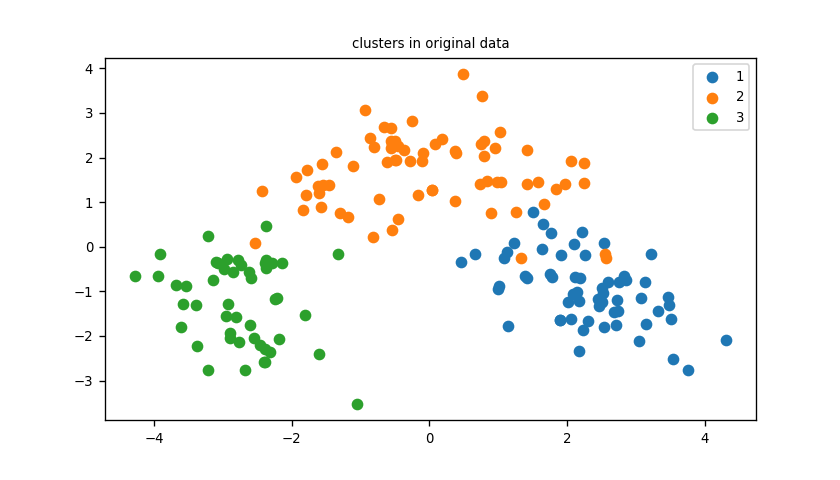

In [23]:
# Comparing with the original dataframe cluster labels:
cluster_visualization(wine_df_tf, wine_df['Type'], title = "clusters in original data")

## Observations:
From the scatterplots we can see that KMeans clustering is able to divide the dataset into clusters very well.

## Conclusion:
- After performing hierarchical and KMeans clustering, we see that the **wine dataset can be divided into three clusters using both hierarchical and KMeans clustering algorithm**(the same as the original number). 
- Upon comparing the scatterplots for the original dataset and the clusters formed using hierarchical and KMeans, we see that both KMeans and hierarchical clustering(Linkage method: "ward") are able to pick the original cluster patterns very well. But upon closer inspection, we see that KMeans seems to do the job slightly better.